<a href="https://colab.research.google.com/github/hegazy99/MachineLearning/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC Clustering Project 

In [7]:
%pip install seaborn
%pip install sklearn
%pip install plotnine

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [8]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [9]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [10]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [11]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_hc_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)

In [12]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



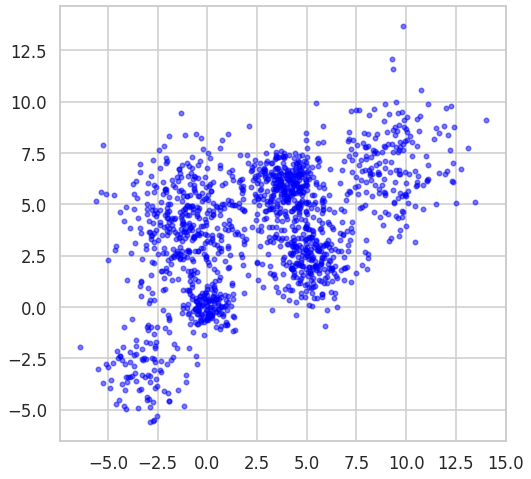

In [13]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

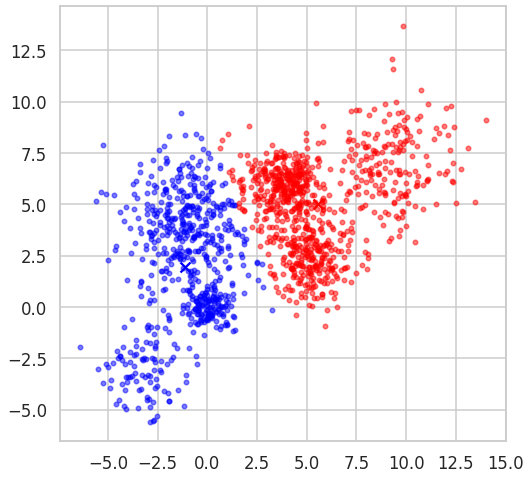

In [14]:
distortions = []
silhouette_scores = []
k2 = KMeans(n_clusters=2).fit(Multi_blob_Data)
display_cluster(Multi_blob_Data,km=k2,num_clusters=2)
distortions.append(k2.inertia_)
score = silhouette_score(Multi_blob_Data,labels=k2.labels_)
silhouette_scores.append(score)

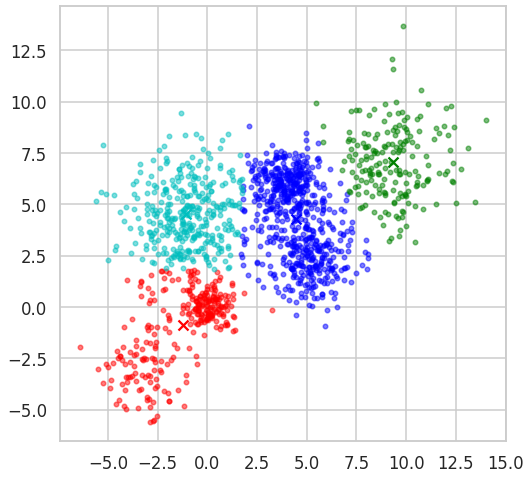

In [15]:
k4 = KMeans(n_clusters=4).fit(Multi_blob_Data)
display_cluster(Multi_blob_Data,km=k4,num_clusters=4)
distortions.append(k4.inertia_)
score = silhouette_score(Multi_blob_Data,labels=k4.labels_)
silhouette_scores.append(score)

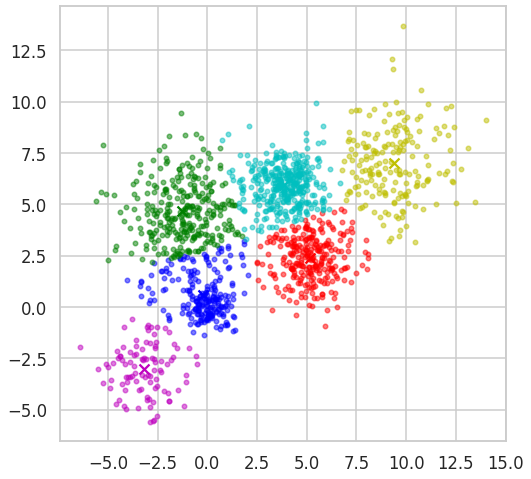

In [16]:
k6 = KMeans(n_clusters=6).fit(Multi_blob_Data)
display_cluster(Multi_blob_Data,km=k6,num_clusters=6)
distortions.append(k6.inertia_)
score = silhouette_score(Multi_blob_Data,labels=k6.labels_)
silhouette_scores.append(score)
silhouette_score_km = max(silhouette_scores)

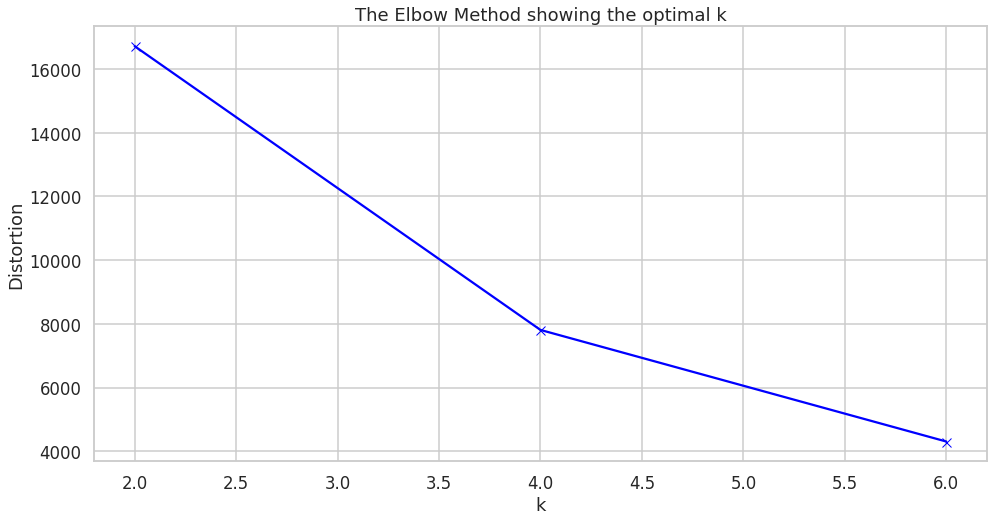

In [17]:
plt.figure(figsize=(16,8))
plt.plot([2,4,6], distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

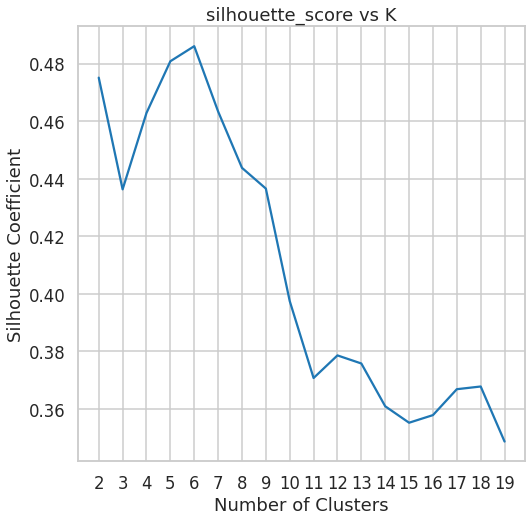

In [18]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }
   
silhouette_coefficients = []
for k in range(2, 20):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(Multi_blob_Data)
  score = silhouette_score(Multi_blob_Data, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('silhouette_score vs K')
plt.show()

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

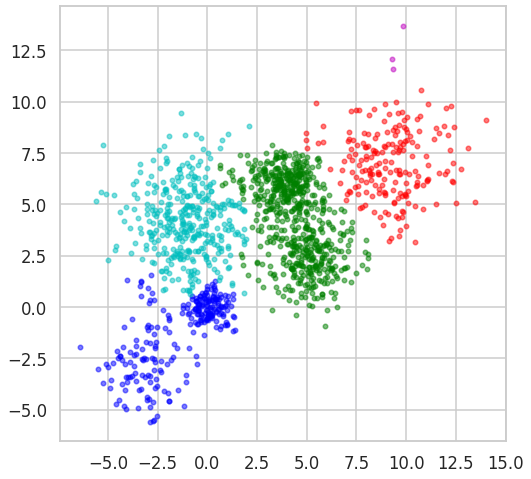

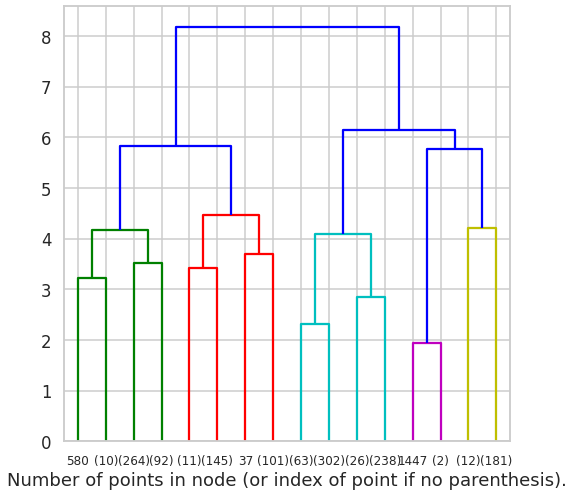

In [19]:
silhouette_scores = []
hc = AgglomerativeClustering(n_clusters=None,affinity='euclidean',linkage='average',distance_threshold=5).fit(Multi_blob_Data)
score = silhouette_score(Multi_blob_Data,labels=hc.labels_)
silhouette_scores.append(score)
display_hc_cluster(Multi_blob_Data,hc,num_clusters=hc.n_clusters_)
plt.show()
# plot the top three levels of the dendrogram
plot_dendrogram(hc, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

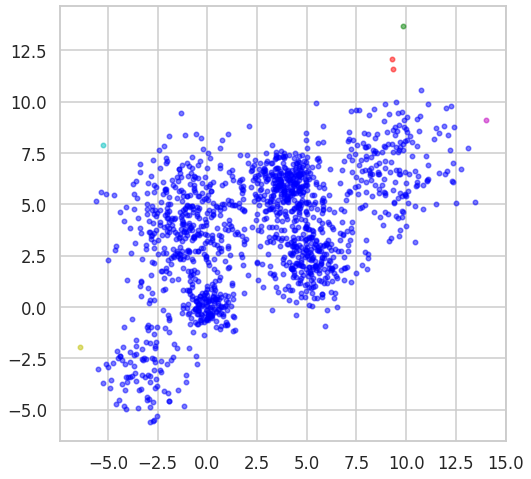

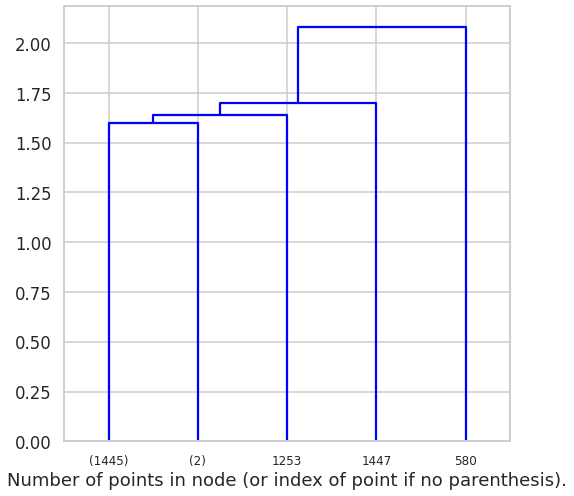

In [20]:
hc = AgglomerativeClustering(n_clusters=None,affinity='euclidean',linkage='single',distance_threshold=1.2).fit(Multi_blob_Data)
score = silhouette_score(Multi_blob_Data,labels=hc.labels_)
silhouette_scores.append(score)
display_hc_cluster(Multi_blob_Data,hc,num_clusters=hc.n_clusters_)
plt.show()
# plot the top three levels of the dendrogram
plot_dendrogram(hc, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

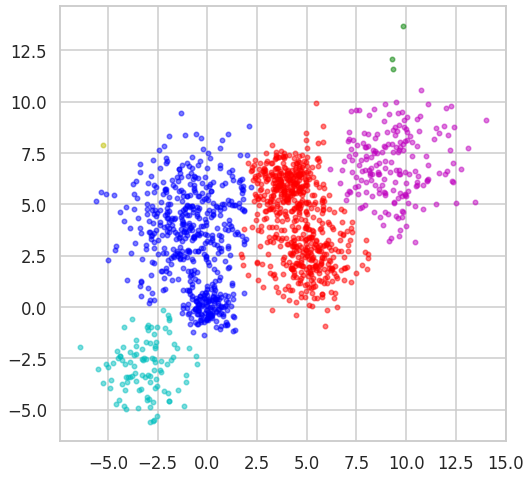

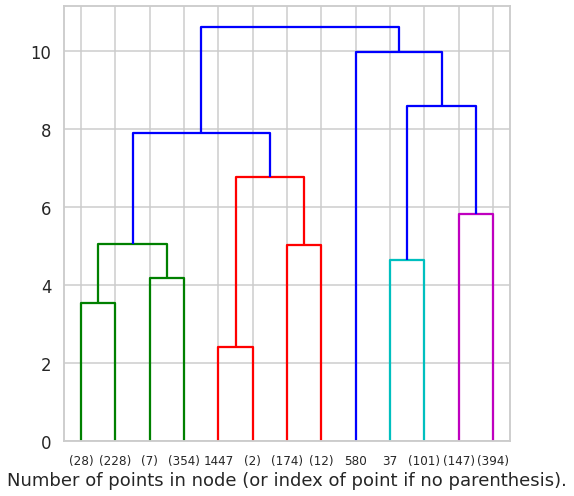

In [21]:
hc = AgglomerativeClustering(n_clusters=None,affinity='manhattan',linkage='average',distance_threshold=6).fit(Multi_blob_Data)
score = silhouette_score(Multi_blob_Data,labels=hc.labels_)
silhouette_scores.append(score)
display_hc_cluster(Multi_blob_Data,hc,num_clusters=hc.n_clusters_)
plt.show()
# plot the top three levels of the dendrogram
plot_dendrogram(hc, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

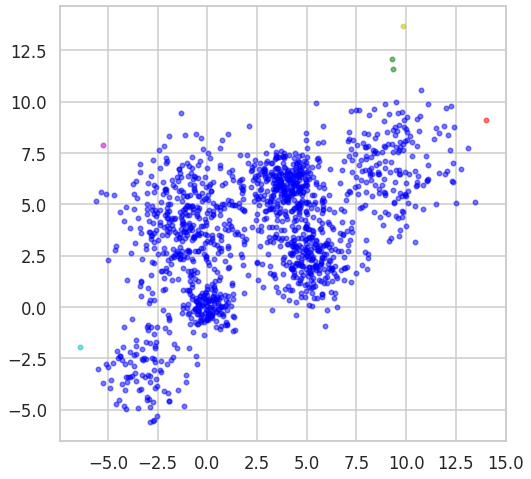

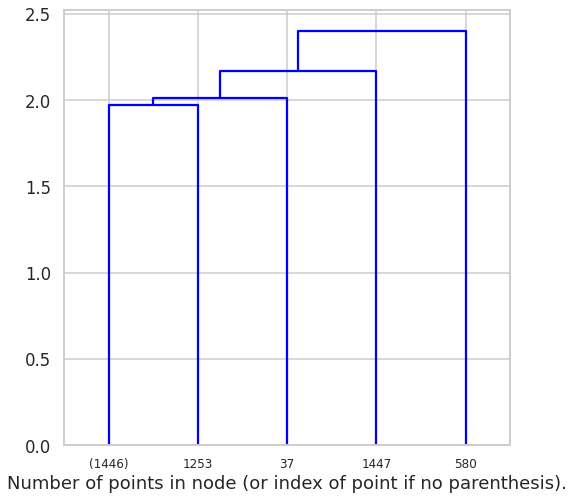

In [22]:
hc = AgglomerativeClustering(n_clusters=None,affinity='manhattan',linkage='single',distance_threshold=1.5).fit(Multi_blob_Data)
score = silhouette_score(Multi_blob_Data,labels=hc.labels_)
silhouette_scores.append(score)
display_hc_cluster(Multi_blob_Data,hc,num_clusters=hc.n_clusters_)
plt.show()
# plot the top three levels of the dendrogram
plot_dendrogram(hc, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

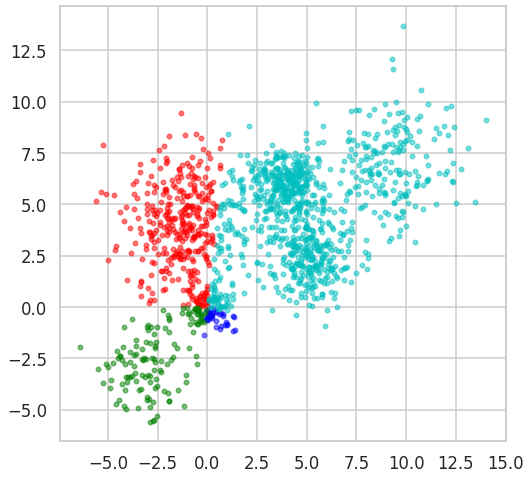

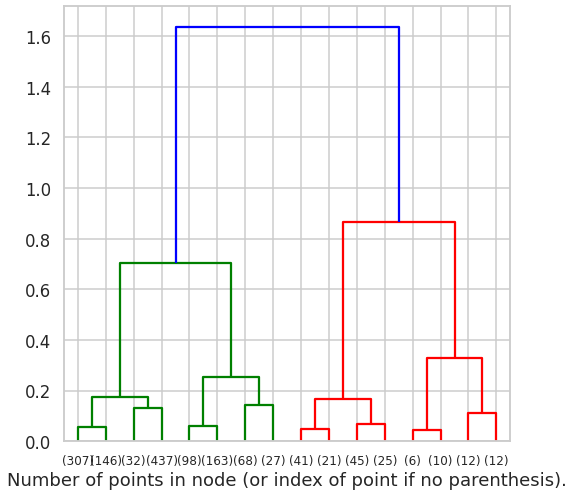

In [23]:
hc = AgglomerativeClustering(n_clusters=None,affinity='cosine',linkage='average',distance_threshold=0.5).fit(Multi_blob_Data)
score = silhouette_score(Multi_blob_Data,labels=hc.labels_)
silhouette_scores.append(score)
display_hc_cluster(Multi_blob_Data,hc,num_clusters=hc.n_clusters_)
plt.show()
# plot the top three levels of the dendrogram
plot_dendrogram(hc, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

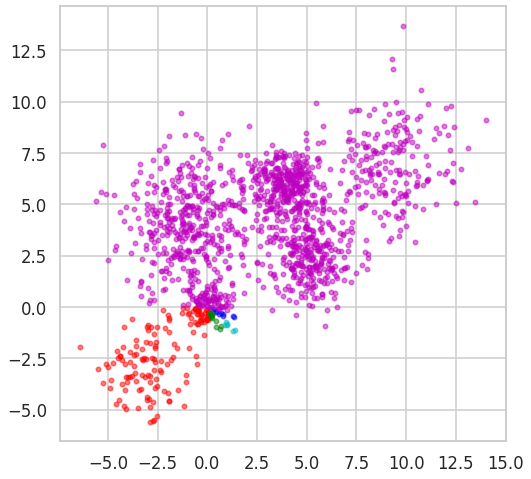

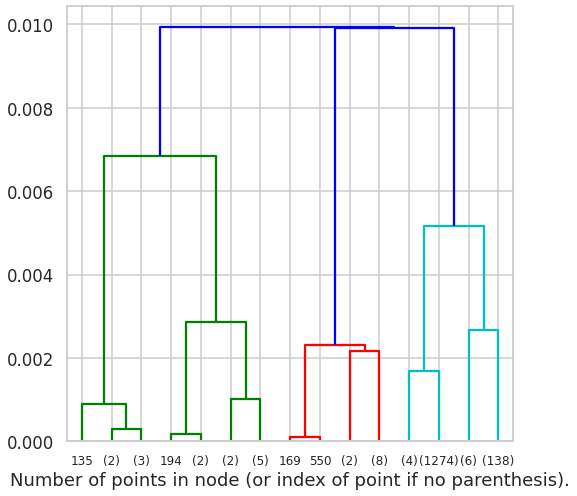

In [24]:
hc = AgglomerativeClustering(n_clusters=None,affinity='cosine',linkage='single',distance_threshold=0.005).fit(Multi_blob_Data)
score = silhouette_score(Multi_blob_Data,labels=hc.labels_)
silhouette_scores.append(score)
display_hc_cluster(Multi_blob_Data,hc,num_clusters=hc.n_clusters_)
plt.show()
# plot the top three levels of the dendrogram
plot_dendrogram(hc, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

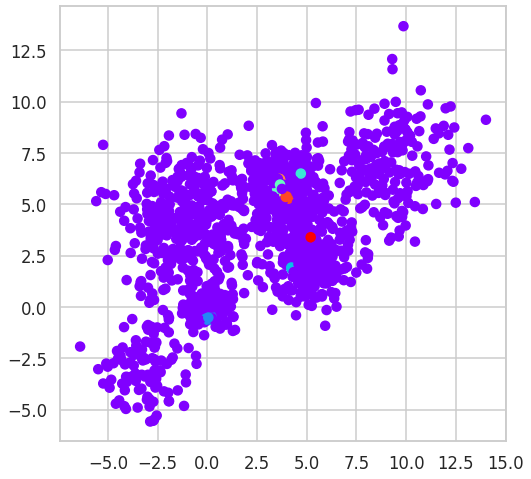

In [25]:
from sklearn.cluster import DBSCAN
silhouette_coefficients = []
db = DBSCAN(eps=0.1, min_samples=5)
db_fitted = db.fit(Multi_blob_Data)
score = silhouette_score(Multi_blob_Data, db_fitted.labels_)
silhouette_coefficients.append(score)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=db.fit_predict(Multi_blob_Data), cmap="rainbow")

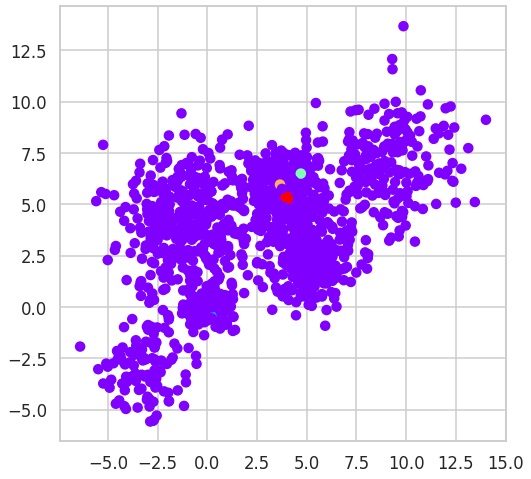

In [26]:
db = DBSCAN(eps=0.1, min_samples=6)
db_fitted = db.fit(Multi_blob_Data)
score = silhouette_score(Multi_blob_Data, db_fitted.labels_)
silhouette_coefficients.append(score)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=db.fit_predict(Multi_blob_Data), cmap="rainbow")

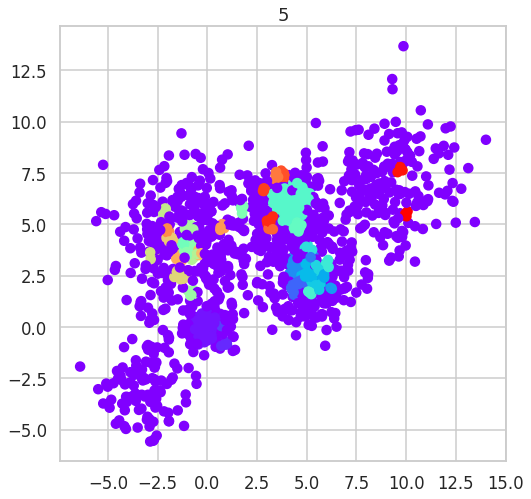

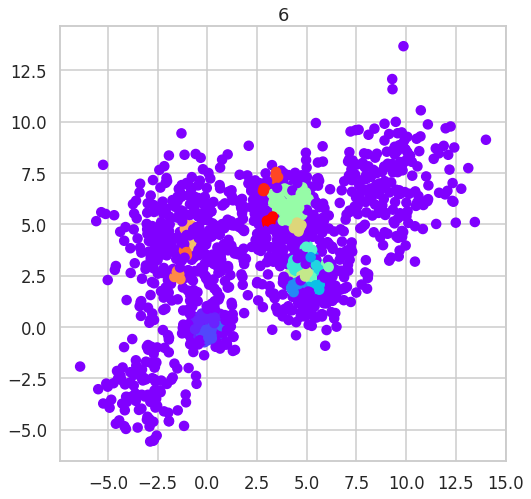

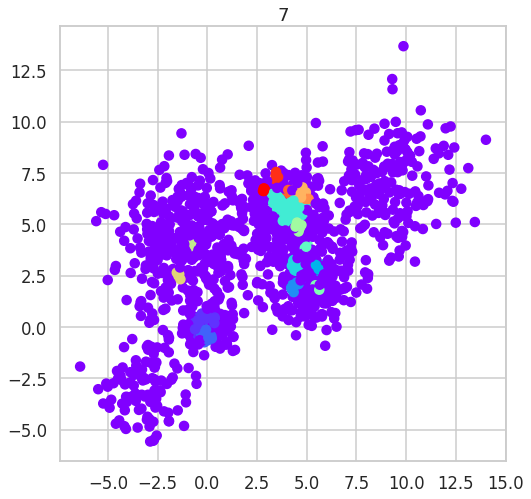

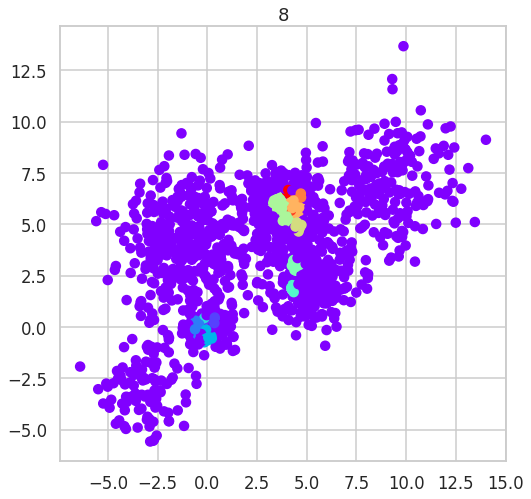

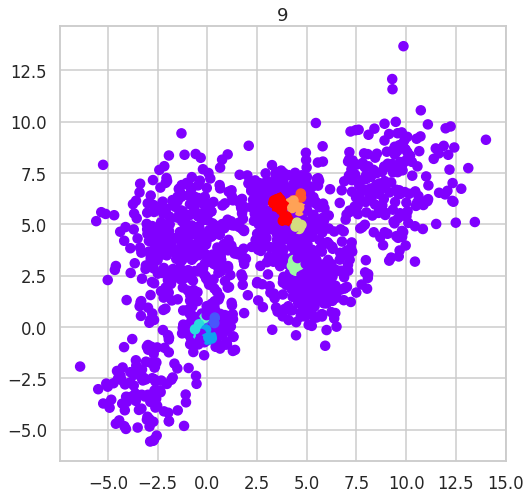

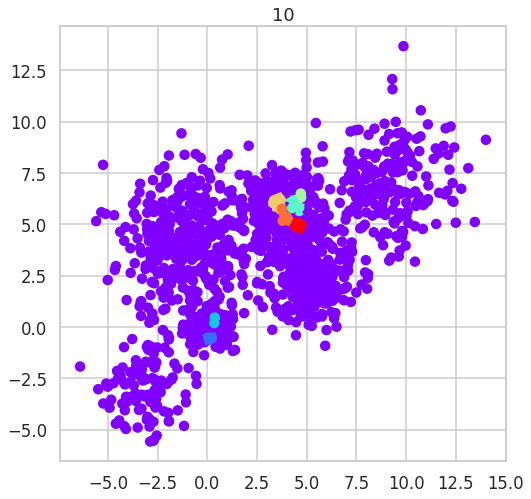

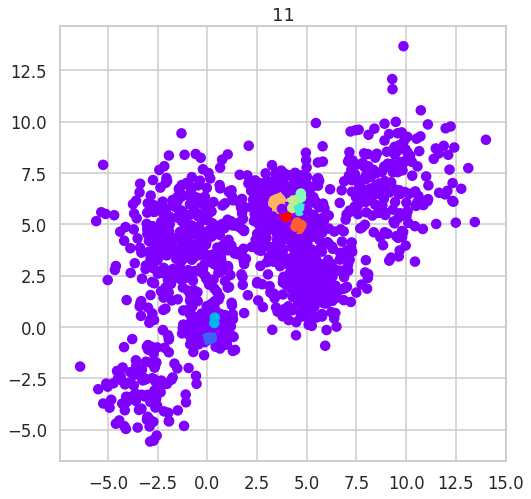

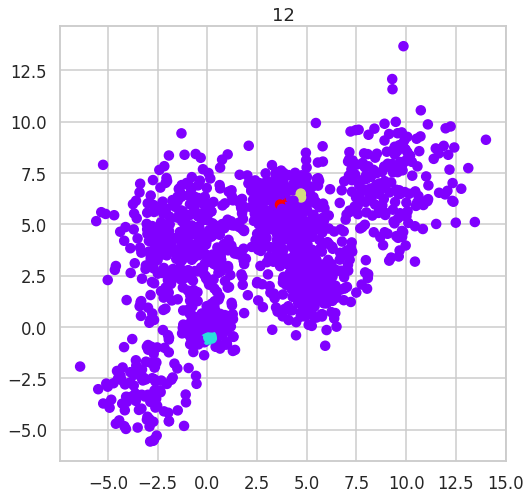

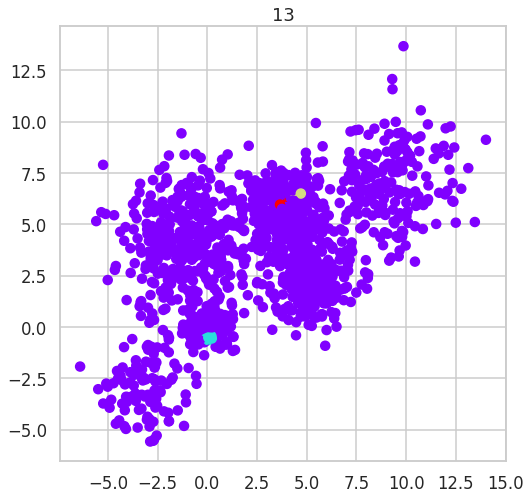

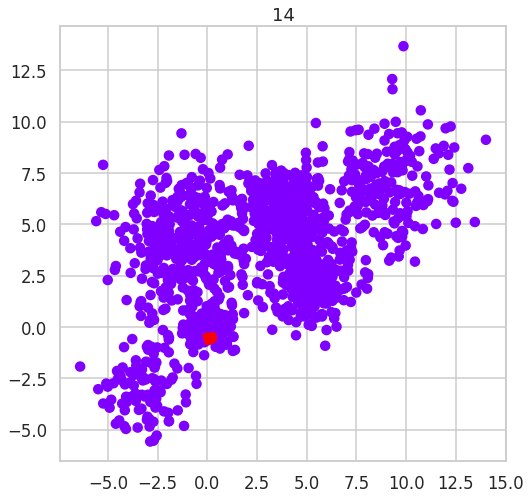

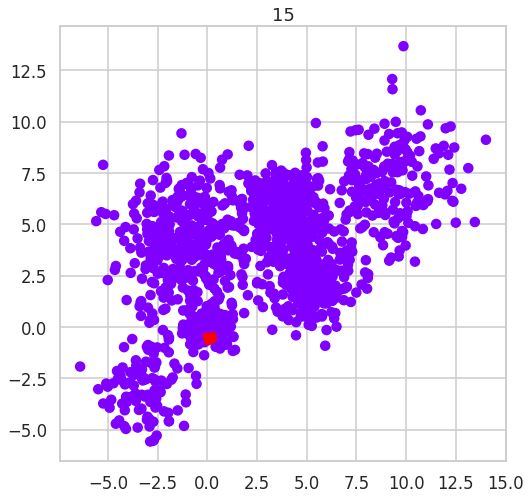

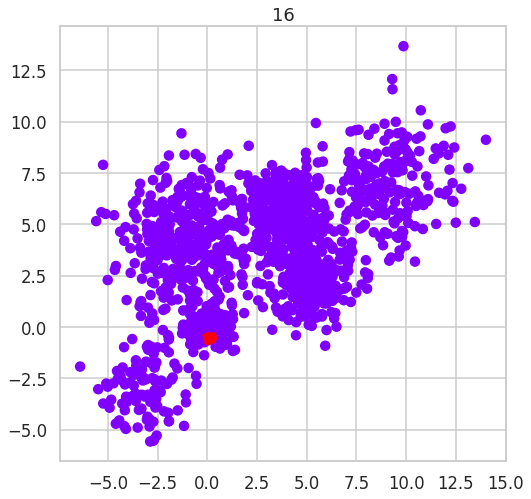

In [27]:
for k in range(5, 17):
  db = DBSCAN(eps=0.2, min_samples=k)
  db_fitted = db.fit(Multi_blob_Data)
  score = silhouette_score(Multi_blob_Data, db_fitted.labels_)
  silhouette_coefficients.append(score)
  plt.figure()
  plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=db.fit_predict(Multi_blob_Data), cmap="rainbow")
  plt.title(k)
  plt.show()

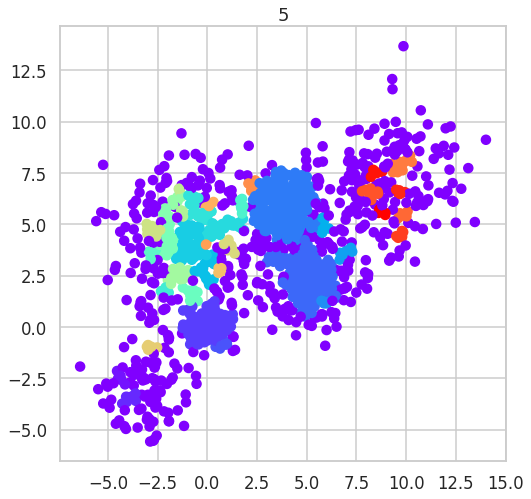

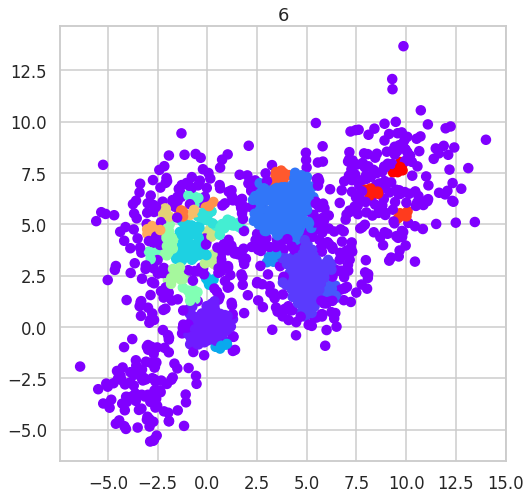

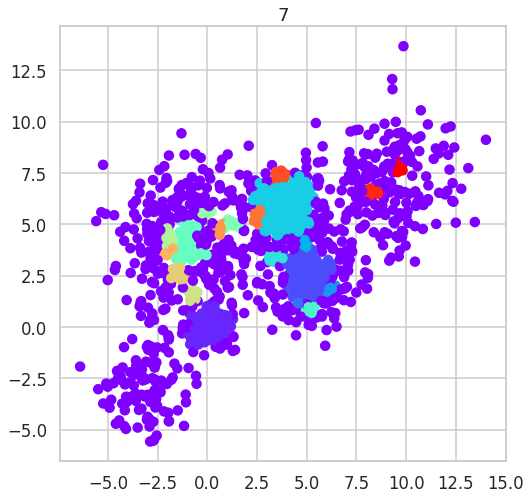

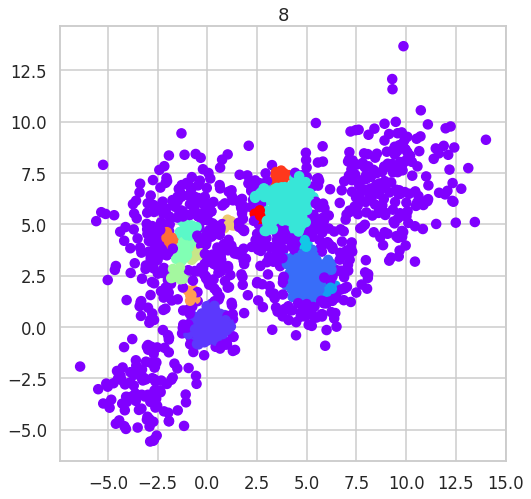

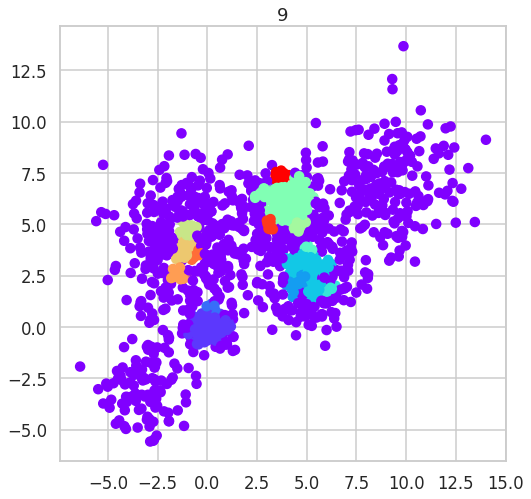

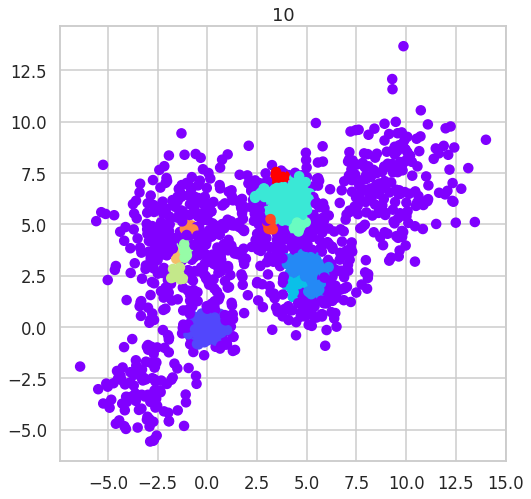

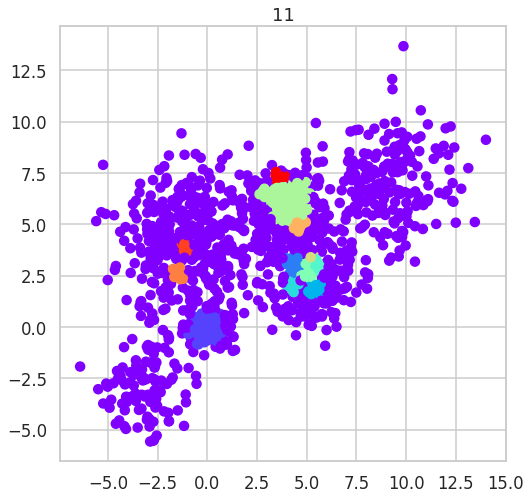

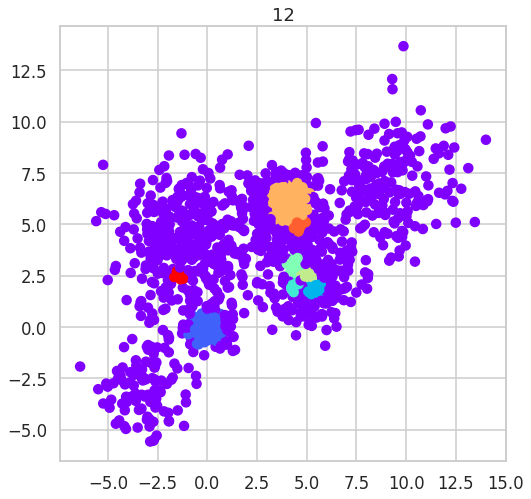

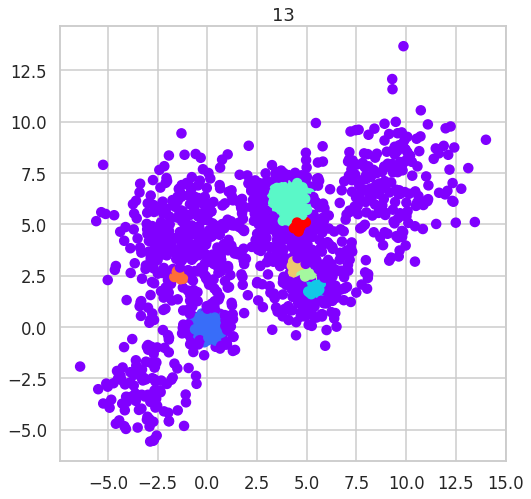

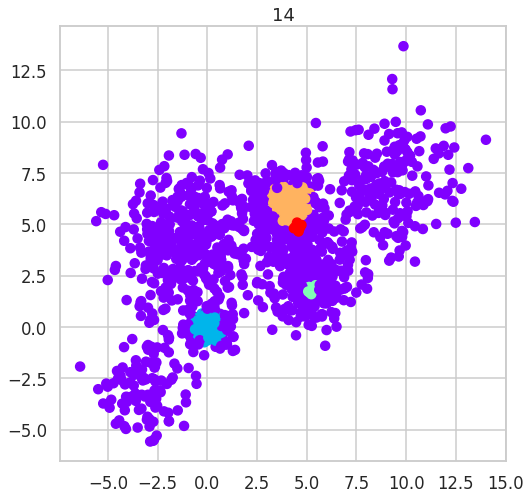

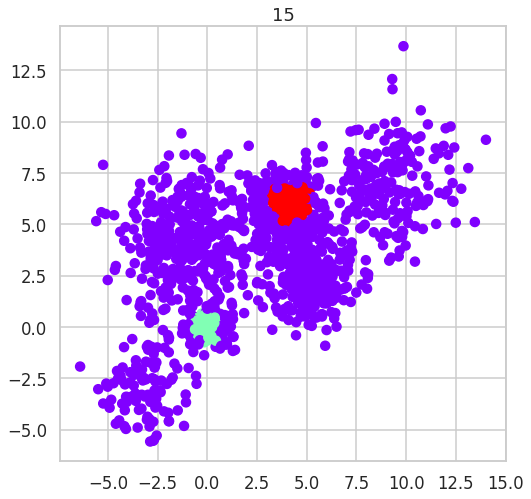

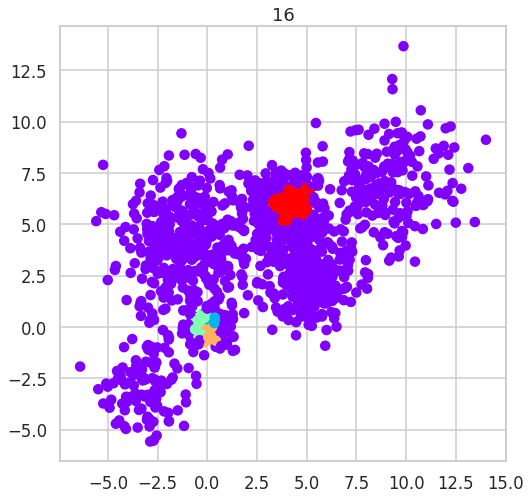

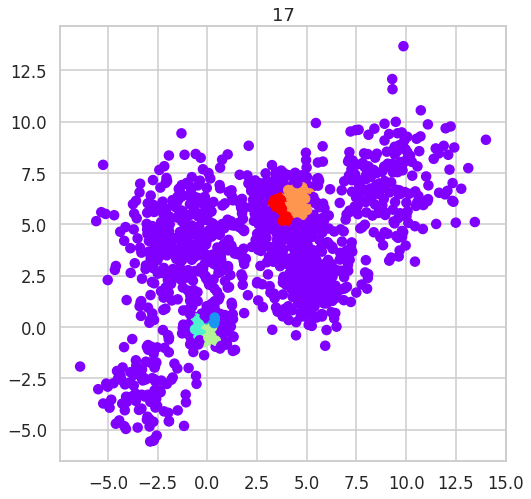

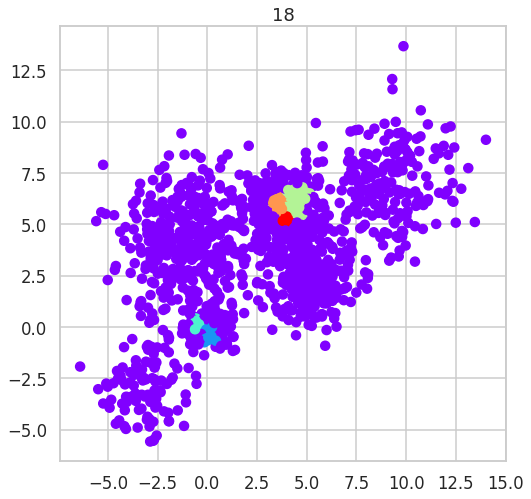

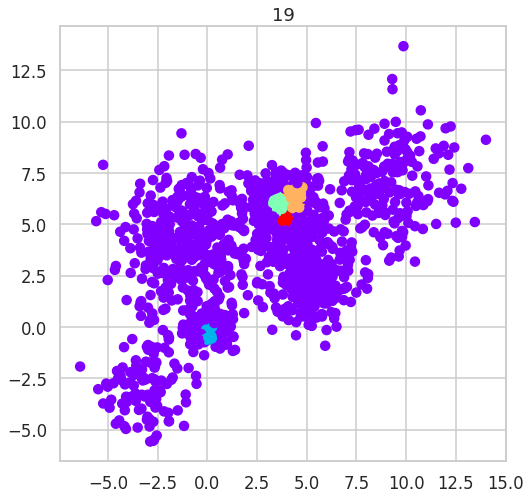

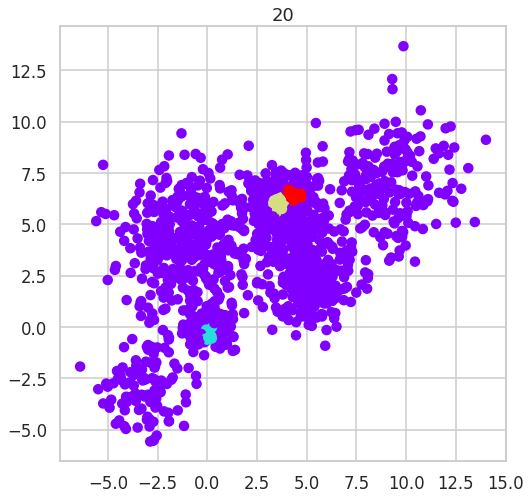

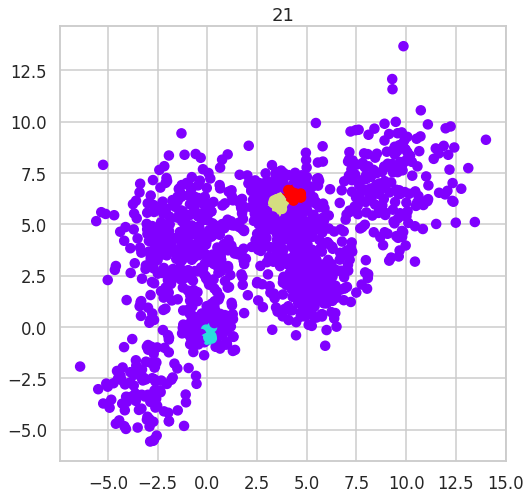

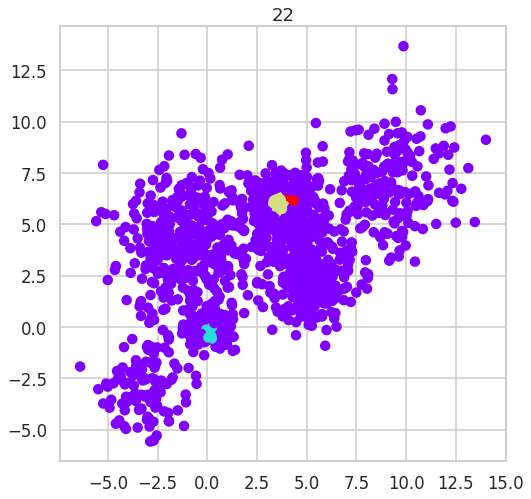

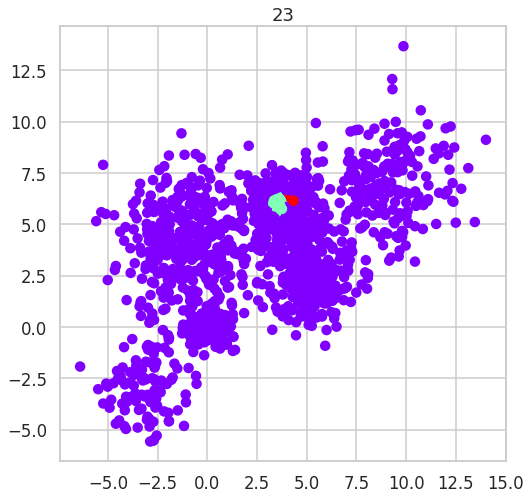

In [28]:
for k in range(5, 24):
  db = DBSCAN(eps=0.3, min_samples=k)
  db_fitted = db.fit(Multi_blob_Data)
  score = silhouette_score(Multi_blob_Data, db_fitted.labels_)
  silhouette_coefficients.append(score)
  plt.figure()
  plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=db.fit_predict(Multi_blob_Data), cmap="rainbow")
  plt.title(k)
  plt.show()

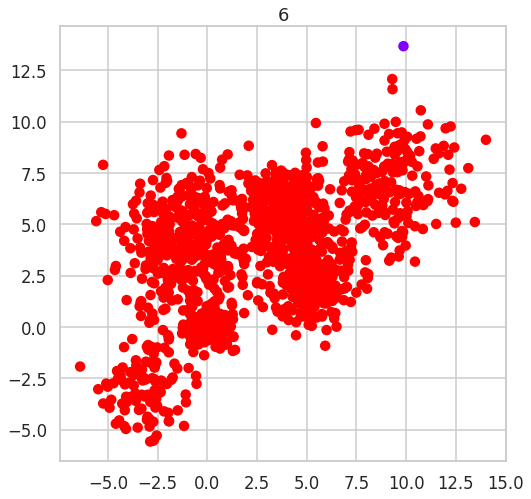

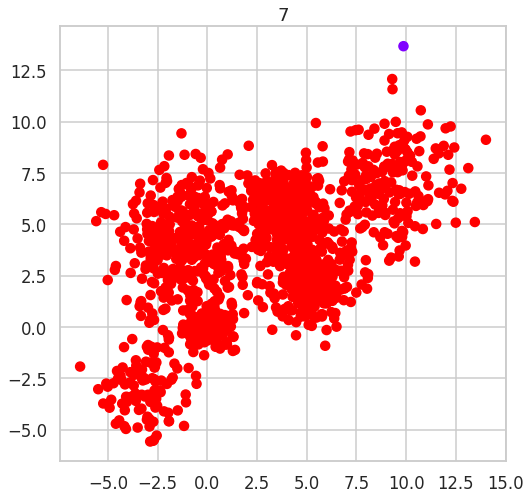

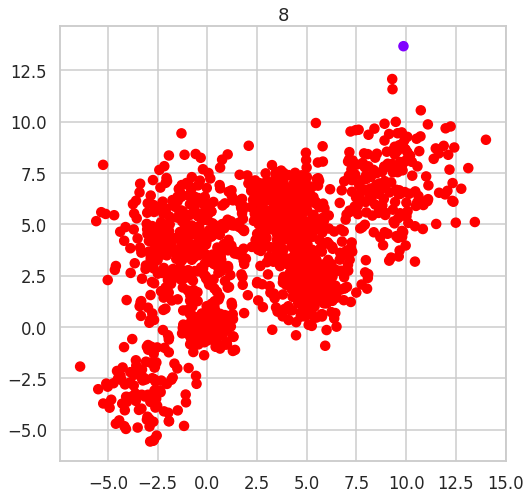

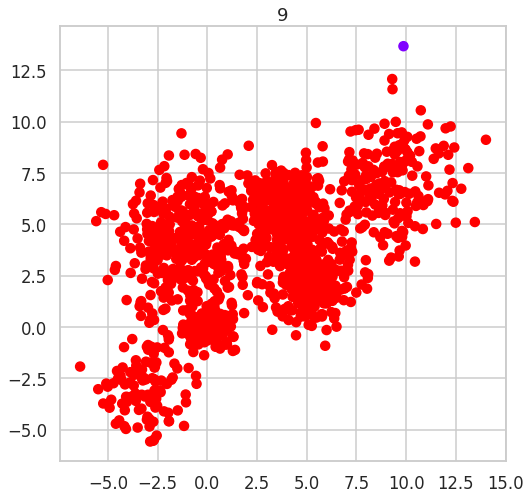

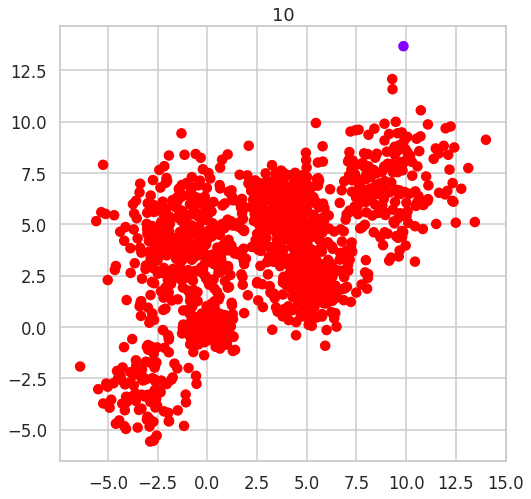

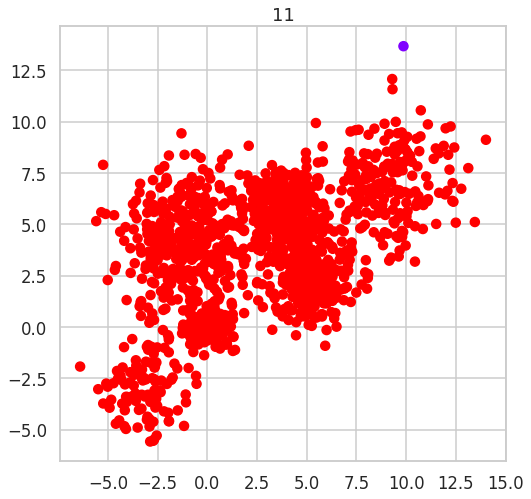

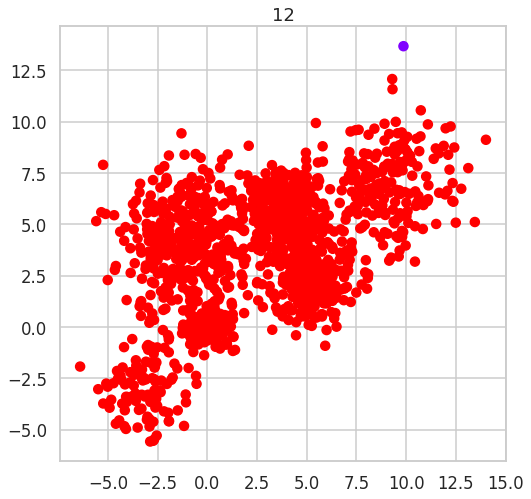

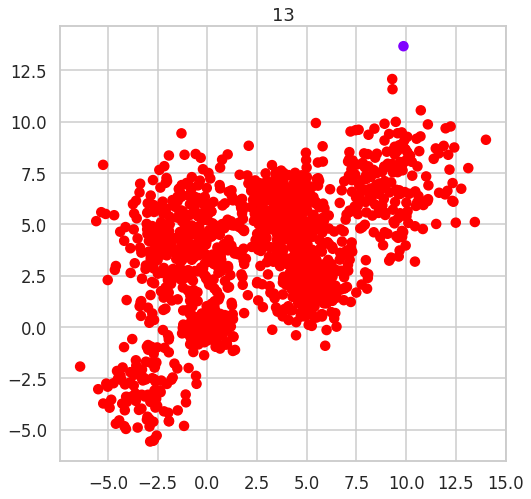

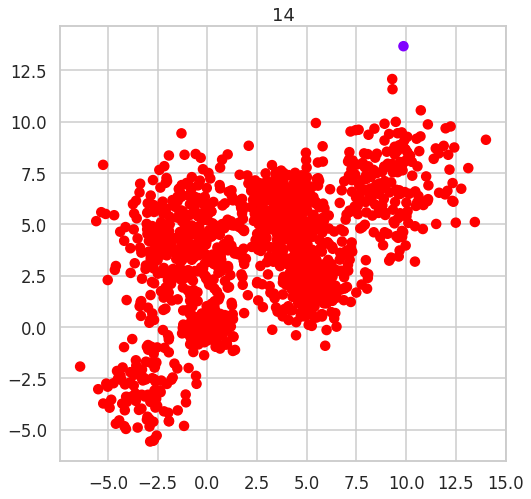

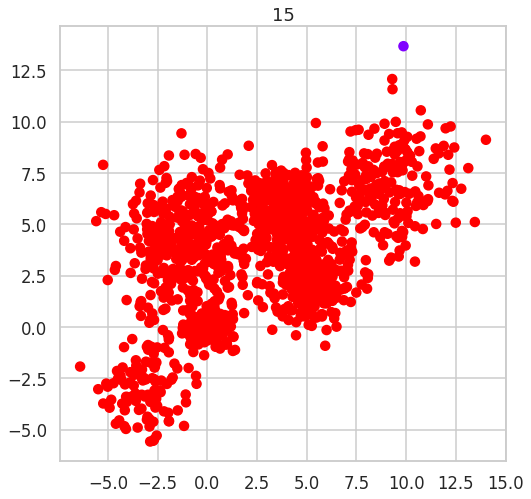

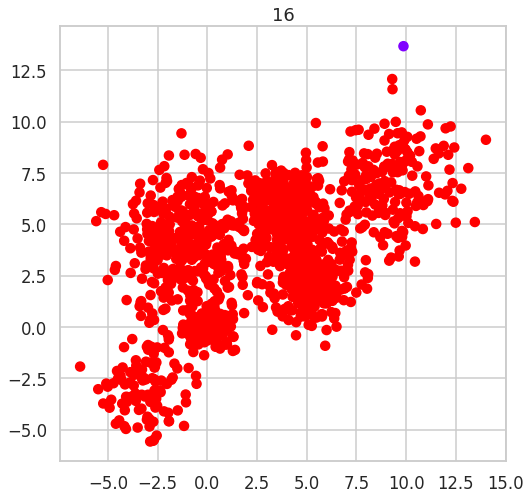

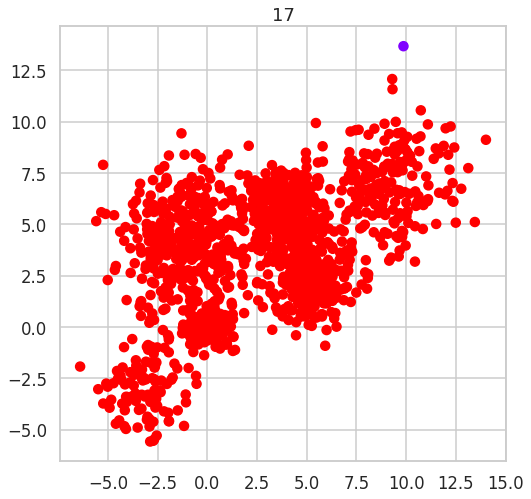

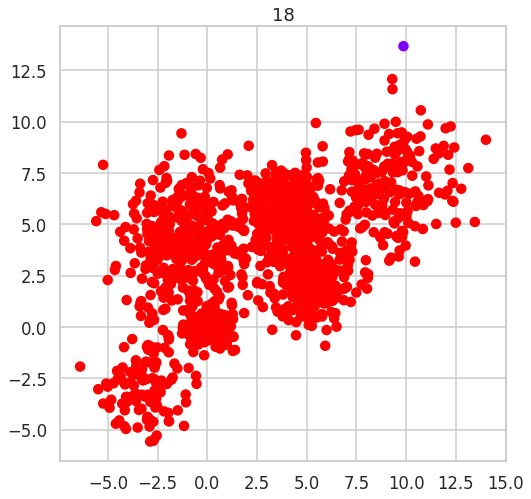

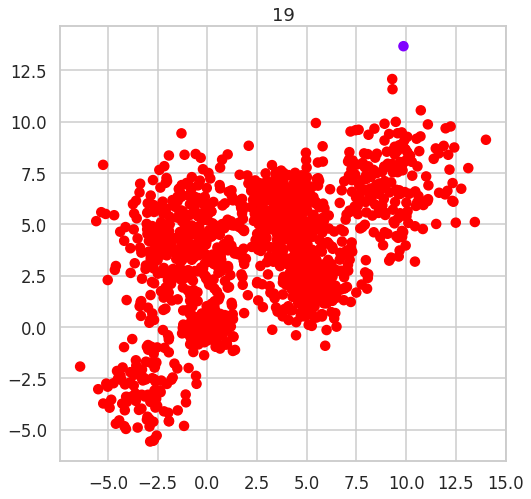

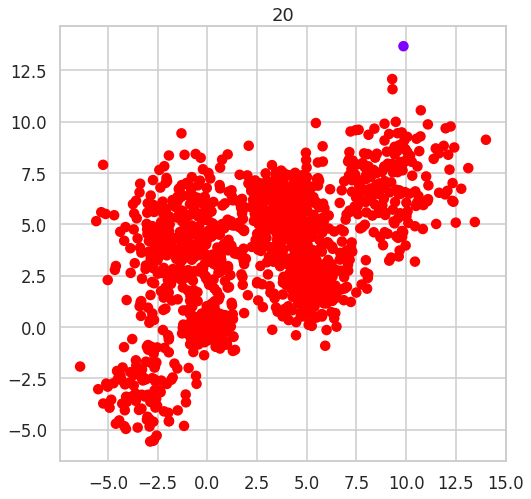

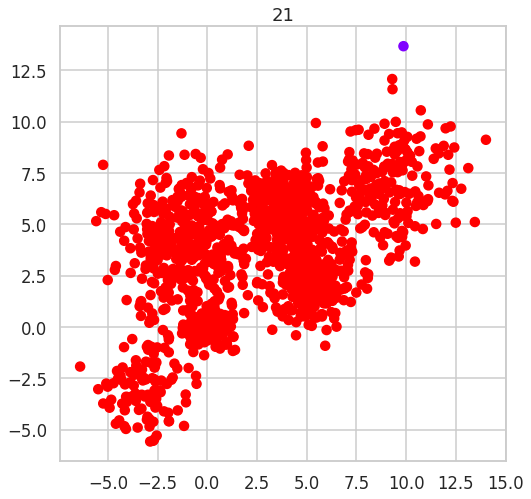

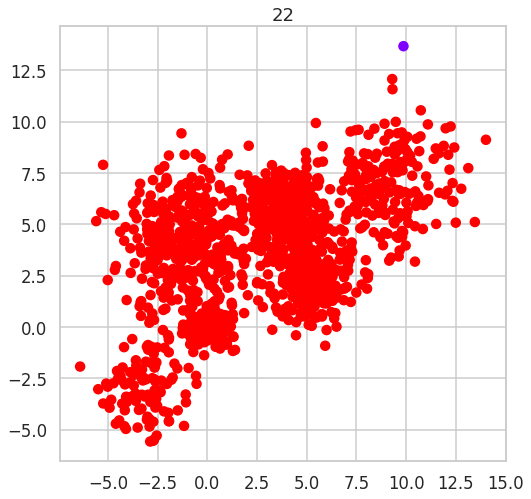

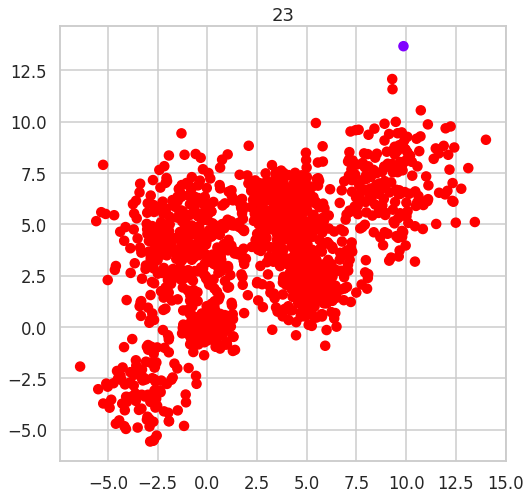

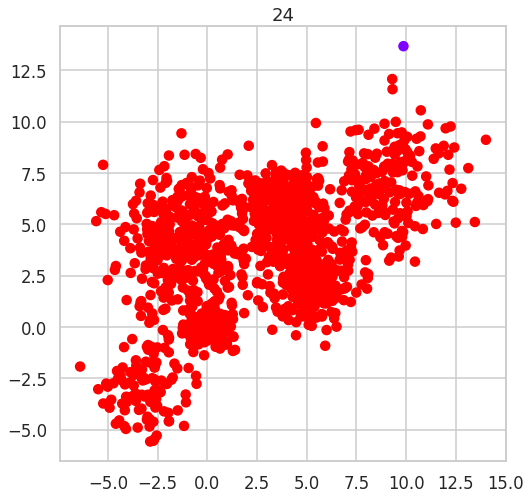

In [29]:
for k in range(6, 25):
  db = DBSCAN(eps=2.1, min_samples=k)
  db_fitted = db.fit(Multi_blob_Data)
  score = silhouette_score(Multi_blob_Data, db_fitted.labels_)
  silhouette_coefficients.append(score)
  plt.figure()
  plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=db.fit_predict(Multi_blob_Data), cmap="rainbow")
  plt.title(k)
  plt.show()

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

-5.021287170713868


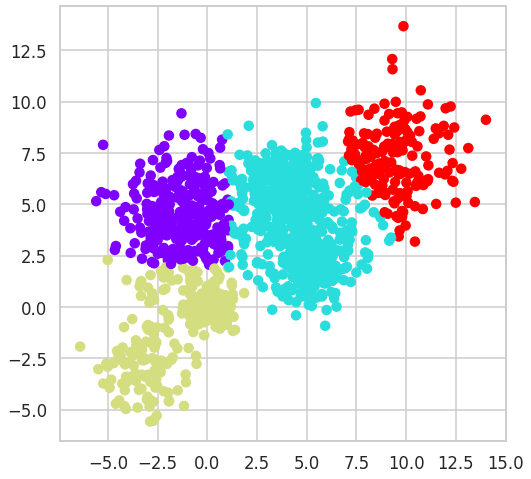

In [30]:
from sklearn.mixture import GaussianMixture
GMM_s = GaussianMixture(covariance_type="spherical", n_components=4)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=GMM_s.fit_predict(Multi_blob_Data), cmap="rainbow")
score = GMM_s.score(Multi_blob_Data)
print(score)

-4.990621841633178


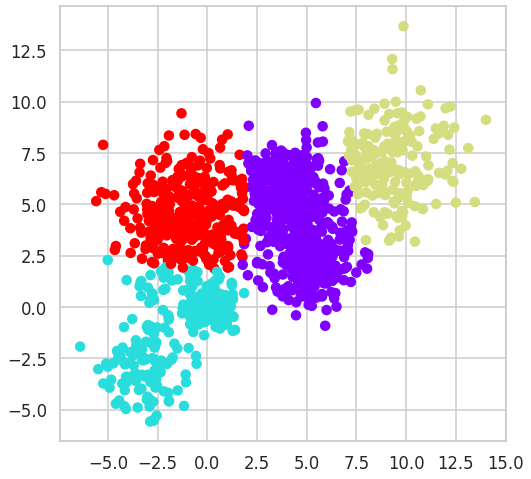

In [31]:
GMM_d = GaussianMixture(covariance_type="diag", n_components=4)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=GMM_d.fit_predict(Multi_blob_Data), cmap="rainbow")
score = GMM_d.score(Multi_blob_Data)
print(score)

-5.003407711942406


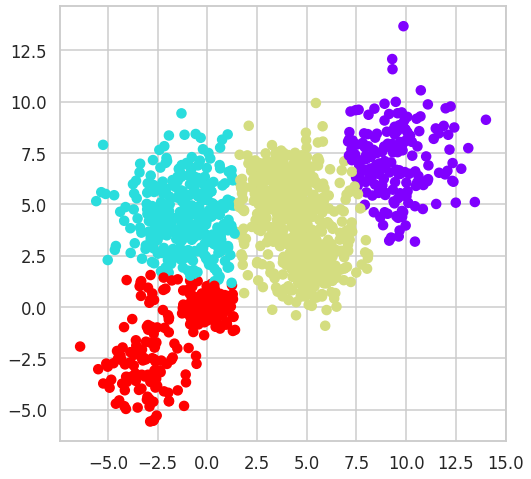

In [32]:
GMM_t = GaussianMixture(covariance_type="tied", n_components=4)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=GMM_t.fit_predict(Multi_blob_Data), cmap="rainbow")
score = GMM_t.score(Multi_blob_Data)
print(score)

-4.950768966795279


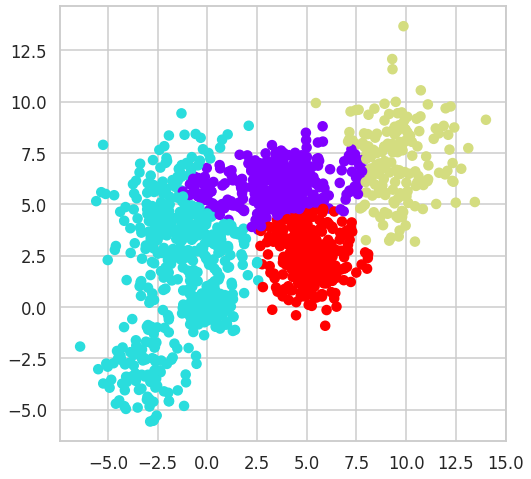

In [33]:
GMM_f = GaussianMixture(covariance_type="full", n_components=4)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=GMM_f.fit_predict(Multi_blob_Data), cmap="rainbow")
score = GMM_f.score(Multi_blob_Data)
print(score)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [34]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [35]:
X = iris_data.data
y = iris_data.target

In [36]:
##### We will literally repeat every step we made on the iris data and then on the 
# customer dataset in order to compare between the clustering approaches
# which are the same steps and plots

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

K Means


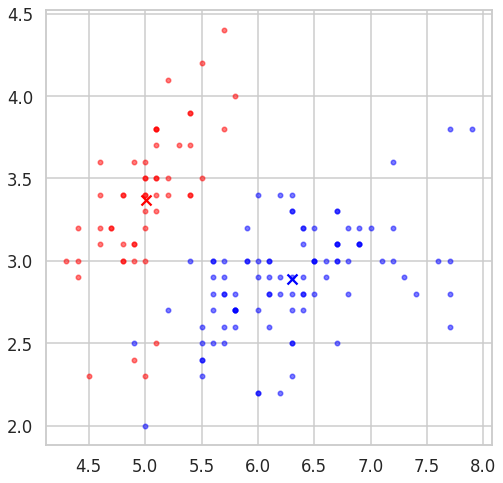

In [37]:
kmeans = KMeans(
        init="random",
        n_clusters=2,
        n_init=10,
        max_iter=300,
        random_state=42 )
clusters_2 = kmeans.fit(X)
display_cluster(X,clusters_2,2)

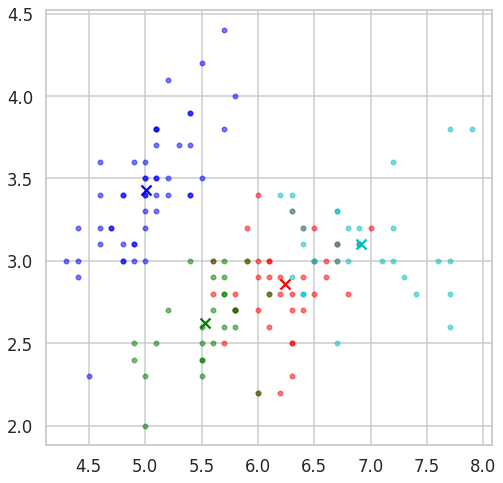

In [38]:
kmeans = KMeans(
        init="random",
        n_clusters=4,
        n_init=10,
        max_iter=300,
        random_state=42 )
clusters_4 = kmeans.fit(X)
display_cluster(X,clusters_4,4)

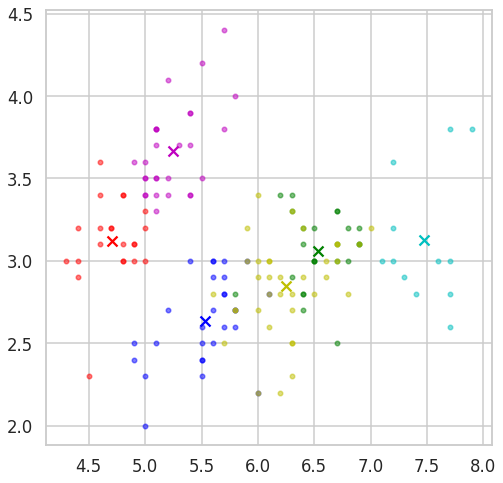

In [39]:
kmeans = KMeans(
        init="random",
        n_clusters=6,
        n_init=10,
        max_iter=300,
        random_state=42 )
clusters_6 = kmeans.fit(X)
display_cluster(X,clusters_6,6)

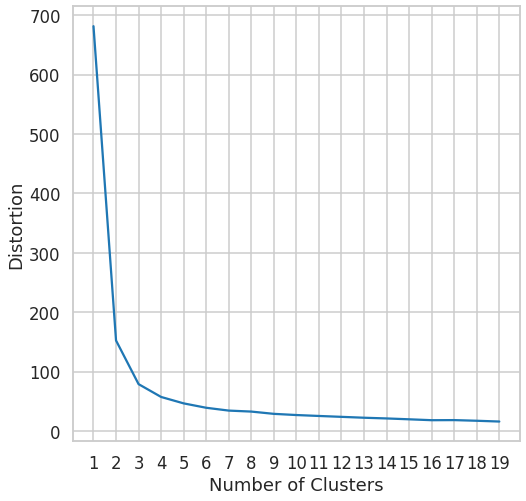

In [41]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }

distortions = []
for k in range(1, 20):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X)
  distortions.append(kmeans.inertia_)

plt.plot(range(1, 20), distortions)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.show()

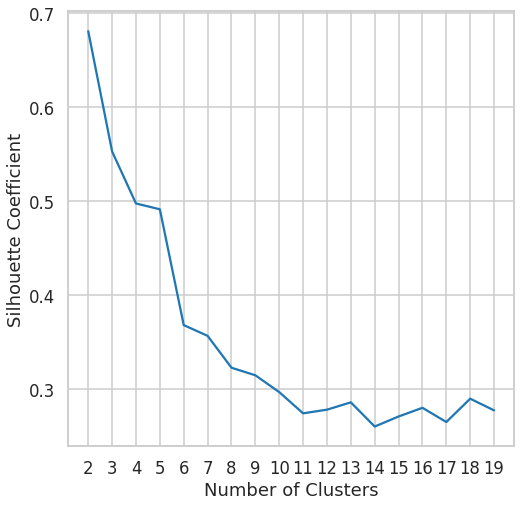

In [43]:
silhouette_coefficients = []
for k in range(2, 20):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

We will complete the steps as we did in the previous dataset doing the hierarical and DB scan and the rest of the steps....

## Customer dataset
Repeat all the above on the customer data set 

we shall repeat the same steps for the customer dataset. and we will notice the change in plotting the data before and after trying to normalize the data